<a href="https://colab.research.google.com/github/j174456/trabalho-SI101/blob/master/2dassets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
ds1= pd.read_csv('2d_dataset_1.csv')
ds2= pd.read_csv('2d_dataset_2.csv')
ds3= pd.read_csv('2d_dataset_3.csv')
ds4= pd.read_csv('2d_dataset_4.csv')
ds1.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,y,alpha,beta
0,1,94,212
1,0,875,700
2,0,877,766
3,0,811,941
4,1,97,178


##analise do dataset

In [2]:
ds1.describe()

,y,alpha,beta
count,509.000000,509.000000,509.000000
mean,0.473477,521.041257,529.379175
std,0.499787,328.287624,334.076091
min,0.000000,74.000000,58.000000
25%,0.000000,186.000000,192.000000
50%,0.000000,720.000000,715.000000
75%,1.000000,833.000000,846.000000
max,1.000000,940.000000,961.000000


In [3]:
ds1.alpha.value_counts()

141    5
272    4
754    4
812    4
826    4
      ..
199    1
198    1
196    1
787    1
904    1
Name: alpha, Length: 306, dtype: int64

In [4]:
ds1.beta.value_counts()

224    5
841    5
154    5
168    4
182    4
      ..
235    1
746    1
134    1
243    1
856    1
Name: beta, Length: 325, dtype: int64

In [5]:
ds1.y.value_counts()

0    268
1    241
Name: y, dtype: int64

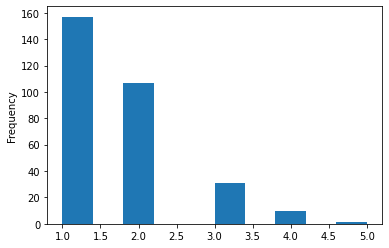

In [6]:
ds1.alpha.value_counts().sort_index().plot.hist()

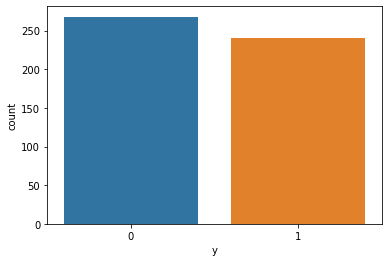

In [7]:
sns.countplot(x="y",data=ds1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


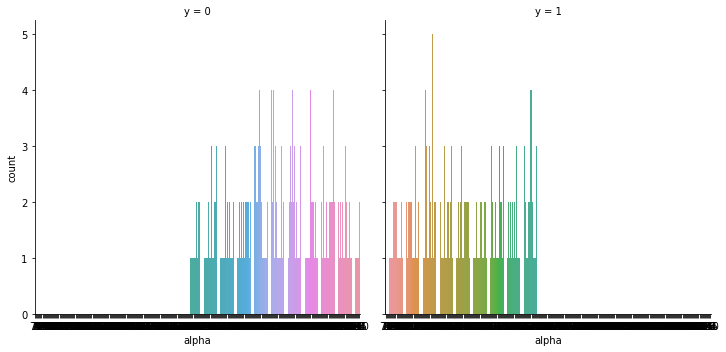

In [8]:
sns.factorplot(x="alpha",col="y",kind="count", data=ds1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


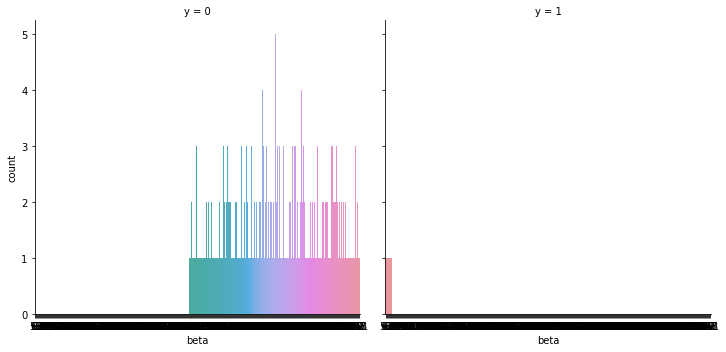

In [9]:
sns.factorplot(x="beta",col="y",kind="count", data=ds1)

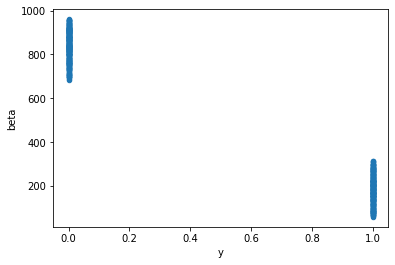

In [10]:
ds1.plot.scatter(x="y",y="beta")

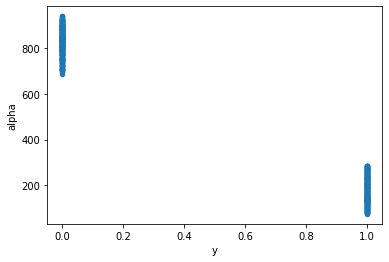

In [11]:
ds1.plot.scatter(x="y",y="alpha")

# Testes manuais

In [12]:
#teste 1
testey =(ds1.alpha >= 521)
testey=testey.apply(lambda x:int(x))
testey
accuracy_score(ds1.y,testey)

0.0

In [13]:
#teste 2
testey =(ds1.beta >= 529)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.0

In [14]:
#teste 3
testey =(ds1.alpha % ds1.beta == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5245579567779961

In [15]:
#teste 4
testey =(ds1.beta % ds1.alpha == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5245579567779961

In [16]:
#teste 5
testey =((ds1.alpha + ds1.beta)%2 == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5049115913555993

In [17]:
#teste 6
testey =((ds1.alpha * ds1.beta)%2 == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.4911591355599214

In [18]:
#teste 7
testey =((ds1.alpha * 2)+ds1.beta == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5265225933202358

In [19]:
#teste 8
testey =((ds1.beta * 2)+ds1.alpha == 0)
testey=testey.apply(lambda x:int(x))
accuracy_score(ds1.y,testey)

0.5265225933202358

# Scikit



##Modelo Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
modelo_bayes = GaussianNB()                # 2. Escolha dos hiperparâmetros e intanciação.

In [21]:
# 3 feature matrix
MatrizAB= ds1.loc[:,['alpha','beta']]
MatrizAB

,alpha,beta
0,94,212
1,875,700
2,877,766
3,811,941
4,97,178
...,...,...
504,202,211
505,241,202
506,158,137
507,210,205


In [22]:
#3 Target Array
ArrayAB= ds1.y
ArrayAB

0      1
1      0
2      0
3      0
4      1
      ..
504    1
505    1
506    1
507    1
508    0
Name: y, Length: 509, dtype: int64

In [23]:
# 3.3 Separação do Banco de Dados
#from sklearn.model_selection import train_test_split
Mteste1 = ds2.loc[:,['alpha','beta']]
Ateste1 = ds2.y


In [24]:
modelo_bayes.fit(MatrizAB,ArrayAB)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
modelo_bayes_resultado=modelo_bayes.predict(Mteste1)

In [26]:
modelo_bayes_resultado

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [27]:
#teste de acuracia
accuracy_score(Ateste1,modelo_bayes_resultado)

0.849112426035503

# ## modelo da árvore de decisões

In [28]:
from sklearn.tree import DecisionTreeClassifier  
modelo_adecisao = DecisionTreeClassifier()
modelo_adecisao.fit(MatrizAB,ArrayAB)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
modelo_adecisao_resultado=modelo_adecisao.predict(Mteste1)

In [30]:
modelo_adecisao_resultado

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [31]:
accuracy_score(Ateste1,modelo_adecisao_resultado)

0.7204142011834319

## Modelo de Regressão logistica

In [32]:
from sklearn.linear_model import LogisticRegression
modelo_lr=LogisticRegression()

In [33]:
modelo_lr.fit(MatrizAB,ArrayAB)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
modelo_lr_resultado = modelo_lr.predict(Mteste1)

In [35]:
accuracy_score(Ateste1,modelo_lr_resultado)

0.8372781065088757

## Modelo de Rede Neural

In [36]:
from sklearn.neural_network import MLPClassifier
modelo_redeN = MLPClassifier()

In [37]:
modelo_redeN.fit(MatrizAB,ArrayAB)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [38]:
modelo_redeN_resultado = modelo_redeN.predict(Mteste1)

In [39]:
accuracy_score(Ateste1,modelo_redeN_resultado)

0.4526627218934911

## Modelo SVC


In [40]:
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
modelo_svc= SVC(C= 0.01,kernel='linear',degree=3,gamma = 'scale',probability=False)

In [41]:
modelo_svc.fit(MatrizAB,ArrayAB)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
modelo_svc_resultado = modelo_svc.predict(Mteste1)

In [43]:
accuracy_score(Ateste1,modelo_svc_resultado)

0.8387573964497042

#Matriz de Confusão

In [44]:
from sklearn.metrics import confusion_matrix
matriz_bayes= confusion_matrix(Ateste1,modelo_bayes_resultado)

Text(83.40000000000006, 0.5, 'Valores Reais')

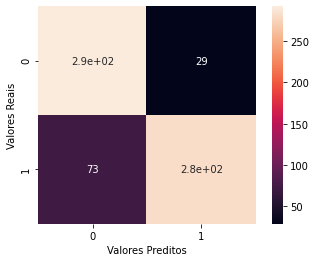

In [45]:
sns.heatmap(matriz_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

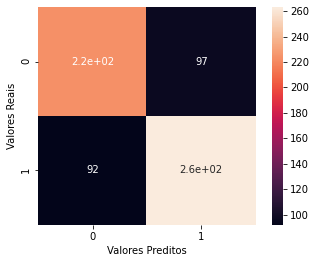

In [46]:
matriz_adecisao= confusion_matrix(Ateste1,modelo_adecisao_resultado)
sns.heatmap(matriz_adecisao, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

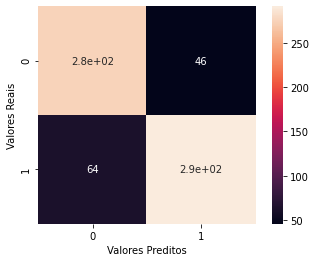

In [47]:
matriz_rl= confusion_matrix(Ateste1,modelo_lr_resultado)
sns.heatmap(matriz_rl, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

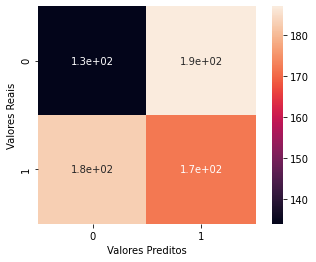

In [48]:
matriz_redeN= confusion_matrix(Ateste1,modelo_redeN_resultado)
sns.heatmap(matriz_redeN, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

# Validação cruzada

In [49]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
modelo_neighbors = KNeighborsClassifier(n_neighbors=3)
cross_val_score(modelo_neighbors, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [50]:
modelo_bayes_cv = GaussianNB()    
cross_val_score(modelo_bayes_cv, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [51]:
modelo_adecisao_cv= DecisionTreeClassifier()
cross_val_score(modelo_adecisao_cv, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [52]:
modelo_lr_cv= LogisticRegression()
cross_val_score(modelo_lr_cv, MatrizAB, ArrayAB, cv = 5)

array([1., 1., 1., 1., 1.])

In [53]:
modelo_redeN_cv= MLPClassifier()
cross_val_score(modelo_redeN_cv, MatrizAB, ArrayAB, cv = 5)

array([0.84313725, 0.84313725, 0.88235294, 0.99019608, 0.76237624])

In [54]:
from sklearn.model_selection import LeaveOneOut
resultado=cross_val_score(modelo_bayes_cv, MatrizAB, ArrayAB, cv=LeaveOneOut())

In [55]:
resultado.mean()

1.0

#Grid search

##SVC

In [56]:
stdSc = StandardScaler()
svm = SVC(kernel="linear", C = 0.1)

pipeline = Pipeline([('transformer', stdSc), ('predictor', svm)])

scores = cross_val_score(pipeline, MatrizAB, ArrayAB, cv=5, scoring="accuracy")
scores

array([1., 1., 1., 1., 1.])

In [57]:
C_range = np.logspace(-1, 4, 10)
param_grid = dict(predictor__C = C_range,predictor__gamma = np.logspace(-4, 3, 10))
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(MatrizAB, ArrayAB)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('predictor',
                                        SVC(C=0.1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
       1.66810054e+01, 5.99484250e+01, 2.154

In [58]:
accuracy_score(Ateste1,grid.predict(Mteste1))

0.841715976331361

In [59]:
grid.cv_results_["mean_test_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
grid.cv_results_["params"]

[{'predictor__C': 0.1, 'predictor__gamma': 0.0001},
 {'predictor__C': 0.1, 'predictor__gamma': 0.0005994842503189409},
 {'predictor__C': 0.1, 'predictor__gamma': 0.003593813663804626},
 {'predictor__C': 0.1, 'predictor__gamma': 0.021544346900318846},
 {'predictor__C': 0.1, 'predictor__gamma': 0.1291549665014884},
 {'predictor__C': 0.1, 'predictor__gamma': 0.774263682681127},
 {'predictor__C': 0.1, 'predictor__gamma': 4.641588833612782},
 {'predictor__C': 0.1, 'predictor__gamma': 27.825594022071257},
 {'predictor__C': 0.1, 'predictor__gamma': 166.81005372000593},
 {'predictor__C': 0.1, 'predictor__gamma': 1000.0},
 {'predictor__C': 0.35938136638046275, 'predictor__gamma': 0.0001},
 {'predictor__C': 0.35938136638046275,
  'predictor__gamma': 0.0005994842503189409},
 {'predictor__C': 0.35938136638046275,
  'predictor__gamma': 0.003593813663804626},
 {'predictor__C': 0.35938136638046275,
  'predictor__gamma': 0.021544346900318846},
 {'predictor__C': 0.35938136638046275, 'predictor__gamma':

In [61]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'predictor__C': 0.1, 'predictor__gamma': 0.0001}
Pipeline(memory=None,
         steps=[('transformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('predictor',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.0001, kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [62]:
Mteste2 = ds3.loc[:,['alpha','beta']]
Ateste2 = ds3.y
accuracy_score(Ateste2,grid.predict(Mteste2))

0.5080279950596953

##GaucianNB

In [63]:
stdSc = StandardScaler()
modelo_bayes = GaussianNB() 

pipeline = Pipeline([('transformer', stdSc), ('predictor', modelo_bayes)])

scores = cross_val_score(pipeline, MatrizAB, ArrayAB, cv=5, scoring="accuracy")
scores

array([1., 1., 1., 1., 1.])

In [64]:
V_range = np.logspace(-12, -2, 10)
param_grid = dict(predictor__var_smoothing = V_range)
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(MatrizAB, ArrayAB)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('predictor',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'predictor__var_smoothing': array([1.00000000e-12, 1.29154967e-11, 1.66810054e-10, 2.15443469e-09,
       2.78255940e-08, 3.59381366e-07, 4.64158883e-06, 5.99484250e-05,
       7.74263683e-04, 1.00000000e-02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [65]:
accuracy_score(Ateste1,grid.predict(Mteste1))

0.849112426035503

In [66]:
grid.cv_results_["mean_test_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
grid.cv_results_["params"]

[{'predictor__var_smoothing': 1e-12},
 {'predictor__var_smoothing': 1.2915496650148827e-11},
 {'predictor__var_smoothing': 1.6681005372000558e-10},
 {'predictor__var_smoothing': 2.1544346900318866e-09},
 {'predictor__var_smoothing': 2.782559402207126e-08},
 {'predictor__var_smoothing': 3.5938136638046254e-07},
 {'predictor__var_smoothing': 4.641588833612782e-06},
 {'predictor__var_smoothing': 5.994842503189421e-05},
 {'predictor__var_smoothing': 0.0007742636826811277},
 {'predictor__var_smoothing': 0.01}]

In [68]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'predictor__var_smoothing': 1e-12}
Pipeline(memory=None,
         steps=[('transformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('predictor', GaussianNB(priors=None, var_smoothing=1e-12))],
         verbose=False)


In [69]:
accuracy_score(Ateste2,grid.predict(Mteste2))

0.5137916838205022

#Matriz de cunfusão

Text(83.40000000000006, 0.5, 'Valores Reais')

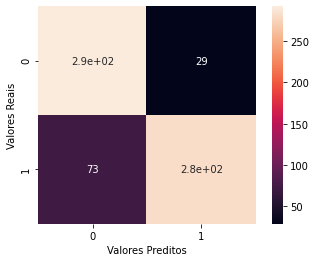

In [70]:
matriz_bayes= confusion_matrix(Ateste1,grid.predict(Mteste1))
sns.heatmap(matriz_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

#Acuracia

In [71]:
accuracy_score(Ateste1,grid.predict(Mteste1))

0.849112426035503

In [72]:
accuracy_score(Ateste1,modelo_bayes_resultado)

0.849112426035503

In [73]:
accuracy_score(Ateste1,modelo_svc_resultado)

0.8387573964497042

#Precisão

In [74]:
def precision(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fp)
precision(Ateste1,grid.predict(Mteste1))

0.9067524115755627

In [75]:
precision(Ateste1,modelo_bayes_resultado)

0.9067524115755627

In [76]:
precision(Ateste1,modelo_svc_resultado)

0.863905325443787

#Recall

In [77]:
def recall(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fn)
recall(Ateste1,grid.predict(Mteste1)) 

0.7943661971830986

In [78]:
recall(Ateste1,modelo_bayes_resultado)

0.7943661971830986

In [79]:
recall(Ateste1,modelo_svc_resultado)

0.8225352112676056

##Medida F

In [80]:
def medida_f(target, prediction) :
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec+prec)
medida_f(Ateste1,grid.predict(Mteste1))

0.8468468468468469

In [81]:
medida_f(Ateste1,modelo_bayes_resultado)

0.8468468468468469

In [82]:
medida_f(Ateste1,modelo_svc_resultado)

0.8427128427128426

#Specificity

In [83]:
def specificity(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn+fp)
specificity(Ateste1,grid.predict(Mteste1)) 

0.9096573208722741

In [84]:
specificity(Ateste1,modelo_bayes_resultado)

0.9096573208722741

In [85]:
specificity(Ateste1,modelo_svc_resultado)

0.8566978193146417